### DSC 210 Course Project
# **Topic 10: Performance Analysis of Libraries and Tools on Linear Algebra Operations**

#### **Group number:** 4
#### **Group members:**

*   Harshil Jain (A59017538)
*   Sai Sree Harsha (A59020345)
*   Aditya Mandke (A59020008)
*   Omkar Bhope (A59016323)


This notebook contains the code to analyse the performance of 4 different libraries (NumPy, PyTorch, TensorFlow and JAX) on 14 different linear algebra operation.

In each of the following sections, we will consider a particular linear algebra operation. We will implement the operation using each of the 4 libraries, record the CPU execution time for different sizes of input matrices and compare performance by plotting the results.



In [2]:
# import all required libraries
import jax
import time
import torch
import scipy
import numpy as np
import pandas as pd
import tensorflow as tf
import jax.numpy as jnp

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# set random seeds
np.random.seed(42)
torch.manual_seed(42)
tf.random.set_seed(42)
key = jax.random.PRNGKey(42)

### Matrix-matrix product

In [3]:
# NumPy
numpy_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = np.random.rand(k, k)
  b = np.random.rand(k, k)
  st = time.process_time()
  c = a@b
  et = time.process_time()
  res = et - st
  numpy_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.0006517659999989434 seconds
Execution time: 0.00012038999999930411 seconds
Execution time: 0.00606716500000104 seconds
Execution time: 0.009105051999998892 seconds
Execution time: 0.03227068800000055 seconds
Execution time: 0.13488592499999896 seconds
Execution time: 0.9700187599999985 seconds
Execution time: 3.232478525000001 seconds
Execution time: 7.425058961000001 seconds
Execution time: 14.177116208999998 seconds


In [4]:
# Torch
torch_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = torch.rand((k, k))
  b = torch.rand((k, k))
  st = time.process_time()
  c = torch.mm(a, b)
  et = time.process_time()
  res = et - st
  torch_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.04738754099999909 seconds
Execution time: 0.0001510799999948631 seconds
Execution time: 0.01699954099999701 seconds
Execution time: 0.0012461020000031908 seconds
Execution time: 0.007152726999997583 seconds
Execution time: 0.03720850500000239 seconds
Execution time: 0.2578402170000018 seconds
Execution time: 0.8203617599999973 seconds
Execution time: 1.9550064800000015 seconds
Execution time: 4.459409309999998 seconds


In [10]:
# TF
tf_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = tf.random.uniform((k, k))
  b = tf.random.uniform((k, k))
  st = time.process_time()
  c = tf.matmul(a, b)
  et = time.process_time()
  res = et - st
  tf_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.00024249500000905755 seconds
Execution time: 0.00028354600000568553 seconds
Execution time: 0.00029309299999624727 seconds
Execution time: 0.0018831139999946345 seconds
Execution time: 0.014674537999994186 seconds
Execution time: 0.0692092740000021 seconds
Execution time: 0.4913289859999992 seconds
Execution time: 1.5831067390000015 seconds
Execution time: 3.7605708429999964 seconds
Execution time: 7.312215641000009 seconds


In [8]:
#JAX
jax_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = jax.random.uniform(key=key, shape=(k, k))
  b = jax.random.uniform(key=key, shape=(k, k))
  st = time.process_time()
  c = jnp.dot(a, b).block_until_ready()
  et = time.process_time()
  res = et - st
  jax_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 7.353400000909005e-05 seconds
Execution time: 0.00010311999999146337 seconds
Execution time: 0.00019287300000314644 seconds
Execution time: 0.00227813200000071 seconds
Execution time: 0.013889958999996566 seconds
Execution time: 0.059920012000006295 seconds
Execution time: 0.49082805700000165 seconds
Execution time: 1.5630122940000035 seconds
Execution time: 3.747395264000005 seconds
Execution time: 7.452143849999999 seconds


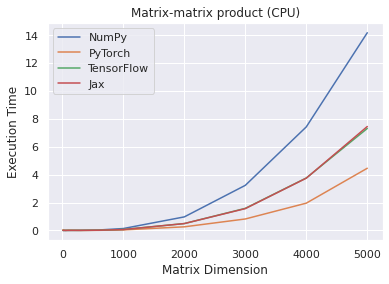

In [11]:
# Plotting graph
sns.set_theme()
times_data = pd.DataFrame({"Dim":dims, "NumPy":numpy_times, "PyTorch":torch_times, "TensorFlow":tf_times, "JAX":jax_times})
sns.lineplot(data=times_data, x="Dim", y="NumPy", label="NumPy")
sns.lineplot(data=times_data, x="Dim", y="PyTorch", label="PyTorch")
sns.lineplot(data=times_data, x="Dim", y="TensorFlow", label="TensorFlow")
sns.lineplot(data=times_data, x="Dim", y="JAX", label="Jax")
plt.xlabel('Matrix Dimension')
plt.ylabel('Execution Time')
plt.title('Matrix-matrix product (CPU)')
plt.legend()
plt.show()

### Matrix-vector product

In [77]:
# NumPy
numpy_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = np.random.rand(k, k)
  b = np.random.rand(k, 1)
  st = time.process_time()
  c = a@b
  et = time.process_time()
  res = et - st
  numpy_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 3.991799999880641e-05 seconds
Execution time: 9.005999999089909e-06 seconds
Execution time: 0.004068754999991597 seconds
Execution time: 0.0018110710000200925 seconds
Execution time: 0.0014348759999904814 seconds
Execution time: 0.0013938220000113688 seconds
Execution time: 0.005299944000000778 seconds
Execution time: 0.01186552400000096 seconds
Execution time: 0.01932193600001142 seconds
Execution time: 0.03247947700000964 seconds


In [78]:
# Torch
torch_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = torch.rand((k, k))
  b = torch.rand((k, 1))
  st = time.process_time()
  c = torch.mm(a, b)
  et = time.process_time()
  res = et - st
  torch_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 7.627400000842499e-05 seconds
Execution time: 6.443899999908353e-05 seconds
Execution time: 5.3484999995134785e-05 seconds
Execution time: 0.00014396099999203216 seconds
Execution time: 0.00026528000000780594 seconds
Execution time: 0.0005048350000151913 seconds
Execution time: 0.0015377420000106667 seconds
Execution time: 0.003222068000013678 seconds
Execution time: 0.008134291000004623 seconds
Execution time: 0.010860414000006813 seconds


In [79]:
# TF
tf_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = tf.random.uniform((k, k))
  b = tf.random.uniform((k, 1))
  st = time.process_time()
  c = tf.matmul(a, b)
  et = time.process_time()
  res = et - st
  tf_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.0003096499999912794 seconds
Execution time: 0.0001177759999961836 seconds
Execution time: 0.012394808999999896 seconds
Execution time: 0.00020045800002321812 seconds
Execution time: 0.0003343019999988428 seconds
Execution time: 0.000646627000008948 seconds
Execution time: 0.002211891000001742 seconds
Execution time: 0.00547629799999072 seconds
Execution time: 0.007982169000001704 seconds
Execution time: 0.011612218999999868 seconds


In [80]:
#JAX
jax_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = jax.random.uniform(key=key, shape=(k, k))
  b = jax.random.uniform(key=key, shape=(k, 1))
  st = time.process_time()
  c = jnp.dot(a, b).block_until_ready()
  et = time.process_time()
  res = et - st
  jax_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 4.036300001075688e-05 seconds
Execution time: 3.336500000727938e-05 seconds
Execution time: 4.756100000236074e-05 seconds
Execution time: 9.890300000847674e-05 seconds
Execution time: 0.0002032019999944623 seconds
Execution time: 0.00038988599999356666 seconds
Execution time: 0.0014833130000226902 seconds
Execution time: 0.004974220999997669 seconds
Execution time: 0.005412086000006866 seconds
Execution time: 0.008382698999980676 seconds


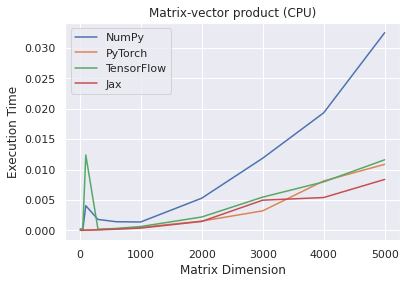

In [81]:
# Plotting graph
sns.set_theme()
times_data = pd.DataFrame({"Dim":dims, "NumPy":numpy_times, "PyTorch":torch_times, "TensorFlow":tf_times, "JAX":jax_times})
sns.lineplot(data=times_data, x="Dim", y="NumPy", label="NumPy")
sns.lineplot(data=times_data, x="Dim", y="PyTorch", label="PyTorch")
sns.lineplot(data=times_data, x="Dim", y="TensorFlow", label="TensorFlow")
sns.lineplot(data=times_data, x="Dim", y="JAX", label="Jax")
plt.xlabel('Matrix Dimension')
plt.ylabel('Execution Time')
plt.title('Matrix-vector product (CPU)')
plt.legend()
plt.show()

### Vector-vector product

In [92]:
# NumPy
numpy_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = np.random.rand(1, k)
  b = np.random.rand(k, 1)
  st = time.process_time()
  c = a@b
  et = time.process_time()
  res = et - st
  numpy_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.0002331979999894429 seconds
Execution time: 5.750299999363051e-05 seconds
Execution time: 4.739600001357758e-05 seconds
Execution time: 1.601599998934944e-05 seconds
Execution time: 7.007000021985732e-06 seconds
Execution time: 6.0589999861804245e-06 seconds
Execution time: 5.914000013262921e-06 seconds
Execution time: 6.546000008711417e-06 seconds
Execution time: 1.1970000002747838e-05 seconds
Execution time: 7.08999999687876e-06 seconds


In [88]:
# Torch
torch_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = torch.rand((1, k))
  b = torch.rand((k, 1))
  st = time.process_time()
  c = torch.mm(a, b)
  et = time.process_time()
  res = et - st
  torch_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 8.504199999492812e-05 seconds
Execution time: 5.099800000607502e-05 seconds
Execution time: 3.4725000006119444e-05 seconds
Execution time: 2.2596999997404055e-05 seconds
Execution time: 1.0841999994681828e-05 seconds
Execution time: 1.0803000009218522e-05 seconds
Execution time: 1.5793999978086504e-05 seconds
Execution time: 1.767999998492087e-05 seconds
Execution time: 2.136999998469946e-05 seconds
Execution time: 2.5445999995099555e-05 seconds


In [89]:
# TF
tf_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = tf.random.uniform((1, k))
  b = tf.random.uniform((k, 1))
  st = time.process_time()
  c = tf.matmul(a, b)
  et = time.process_time()
  res = et - st
  tf_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.00018854799998280214 seconds
Execution time: 0.00019590900001276168 seconds
Execution time: 0.00011618400000656948 seconds
Execution time: 0.0001055040000039753 seconds
Execution time: 0.00012006700001165882 seconds
Execution time: 8.516900001609429e-05 seconds
Execution time: 7.925099998828955e-05 seconds
Execution time: 8.685099999183876e-05 seconds
Execution time: 8.09900000149355e-05 seconds
Execution time: 7.706200000257013e-05 seconds


In [90]:
#JAX
jax_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = jax.random.uniform(key=key, shape=(1, k))
  b = jax.random.uniform(key=key, shape=(k, 1))
  st = time.process_time()
  c = jnp.dot(a, b).block_until_ready()
  et = time.process_time()
  res = et - st
  jax_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 4.546899998558729e-05 seconds
Execution time: 3.885500001388209e-05 seconds
Execution time: 3.810700002304657e-05 seconds
Execution time: 3.430500001400105e-05 seconds
Execution time: 3.0336000008901465e-05 seconds
Execution time: 4.4470000005958354e-05 seconds
Execution time: 3.3950000016602644e-05 seconds
Execution time: 3.511399998501474e-05 seconds
Execution time: 3.730899999254689e-05 seconds
Execution time: 4.010099999618433e-05 seconds


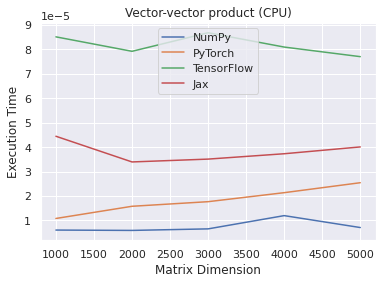

In [98]:
# Plotting graph
sns.set_theme()
times_data = pd.DataFrame({"Dim":dims, "NumPy":numpy_times, "PyTorch":torch_times, "TensorFlow":tf_times, "JAX":jax_times})
times_data = times_data.iloc[5:, :]
sns.lineplot(data=times_data, x="Dim", y="NumPy", label="NumPy")
sns.lineplot(data=times_data, x="Dim", y="PyTorch", label="PyTorch")
sns.lineplot(data=times_data, x="Dim", y="TensorFlow", label="TensorFlow")
sns.lineplot(data=times_data, x="Dim", y="JAX", label="Jax")
plt.xlabel('Matrix Dimension')
plt.ylabel('Execution Time')
plt.title('Vector-vector product (CPU)')
plt.legend()
plt.show()

### Trace

In [4]:
#NumPy
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
numpy_times = []
for k in dims:
  matrix = np.random.rand(k, k)     
  st = time.process_time()   
  trace_np = matrix.trace()
  et = time.process_time()
  res = et - st
  numpy_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.0001606009999992608 seconds
Execution time: 8.924299999968355e-05 seconds
Execution time: 0.00024671900000150515 seconds
Execution time: 6.63379999998881e-05 seconds
Execution time: 6.962299999990762e-05 seconds
Execution time: 0.00010133999999872856 seconds
Execution time: 9.061399999943376e-05 seconds
Execution time: 9.951499999871771e-05 seconds
Execution time: 0.00017397000000052287 seconds
Execution time: 0.0001399079999995223 seconds


In [5]:
# TF
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
tf_times = []
for k in dims:
  matrix = tf.random.uniform((k,k))
  st = time.process_time()   
  trace_tf = tf.linalg.trace(matrix)
  et = time.process_time()
  res = et - st
  tf_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.002639413000000701 seconds
Execution time: 0.0005948050000004201 seconds
Execution time: 0.0005034620000010648 seconds
Execution time: 0.0005313940000011286 seconds
Execution time: 0.0008595240000008886 seconds
Execution time: 0.0007510200000009348 seconds
Execution time: 0.000809908000000803 seconds
Execution time: 0.0007580810000007432 seconds
Execution time: 0.0007982690000005732 seconds
Execution time: 0.0015921179999995871 seconds


In [6]:
# PyTorch
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
torch_times = []
for k in dims:
  matrix = torch.rand(k, k)
  st = time.process_time()   
  trace_torch = torch.trace(matrix) #.item()
  et = time.process_time()
  res = et - st
  torch_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.000621732999999125 seconds
Execution time: 6.863700000003803e-05 seconds
Execution time: 0.0006209489999999818 seconds
Execution time: 4.118300000044428e-05 seconds
Execution time: 9.26360000015336e-05 seconds
Execution time: 0.00010041600000043616 seconds
Execution time: 0.00012609000000018966 seconds
Execution time: 0.00012789700000048754 seconds
Execution time: 0.00011169799999954932 seconds
Execution time: 0.00010636200000035956 seconds


In [10]:
# JAX
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
jax_times = []
for k in dims:
  matrix = jax.random.uniform(key=key, shape=(k,k))
  st = time.process_time()   
  trace_jax = jnp.trace(matrix).block_until_ready()
  et = time.process_time()
  res = et - st
  jax_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 7.967199999825425e-05 seconds
Execution time: 7.711499999984994e-05 seconds
Execution time: 7.620300000255043e-05 seconds
Execution time: 0.000600069000000758 seconds
Execution time: 0.0009511809999978027 seconds
Execution time: 0.002444735000000975 seconds
Execution time: 0.010987473999996666 seconds
Execution time: 0.02940589700000018 seconds
Execution time: 0.02256307000000035 seconds
Execution time: 0.05822960499999752 seconds


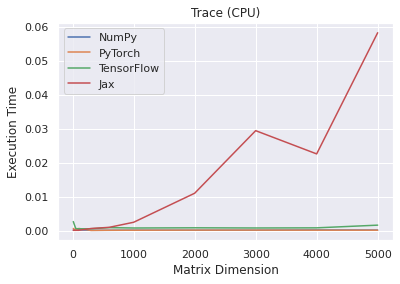

In [11]:
# Plotting graph
sns.set_theme()
times_data = pd.DataFrame({"Dim":dims, "NumPy":numpy_times, "PyTorch":torch_times, "TensorFlow":tf_times, "JAX":jax_times})
sns.lineplot(data=times_data, x="Dim", y="NumPy", label="NumPy")
sns.lineplot(data=times_data, x="Dim", y="PyTorch", label="PyTorch")
sns.lineplot(data=times_data, x="Dim", y="TensorFlow", label="TensorFlow")
sns.lineplot(data=times_data, x="Dim", y="JAX", label="Jax")
plt.xlabel('Matrix Dimension')
plt.ylabel('Execution Time')
plt.title('Trace (CPU)')
plt.legend()
plt.show()

### Transpose

In [13]:
# NumPy
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
numpy_times = []
for k in dims:
  matrix = np.random.rand(k, k)   
  st = time.process_time()    
  trace_matrix = matrix.transpose()
  et = time.process_time()
  res = et - st
  numpy_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 1.5477999998125824e-05 seconds
Execution time: 5.158000000449192e-06 seconds
Execution time: 4.24399999943148e-06 seconds
Execution time: 2.4407000001502865e-05 seconds
Execution time: 5.225499999994554e-05 seconds
Execution time: 6.701999999947361e-05 seconds
Execution time: 2.5458999999727894e-05 seconds
Execution time: 2.3879000000448514e-05 seconds
Execution time: 2.2581999999715663e-05 seconds
Execution time: 2.5558000000813763e-05 seconds


In [14]:
# PyTorch
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
torch_times = []
for k in dims:
  matrix = torch.rand(k, k)
  st = time.process_time()   
  transpose_torch = torch.transpose(matrix,0,1)
  et = time.process_time()
  res = et - st
  torch_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.0021205689999987953 seconds
Execution time: 6.348899999863988e-05 seconds
Execution time: 2.2295000000838172e-05 seconds
Execution time: 0.0012219850000008137 seconds
Execution time: 0.000959374000000679 seconds
Execution time: 0.00016554400000146074 seconds
Execution time: 0.0001237150000008569 seconds
Execution time: 6.828699999772425e-05 seconds
Execution time: 6.475800000060872e-05 seconds
Execution time: 6.56289999980686e-05 seconds


In [15]:
# TF
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
tf_times = []
for k in dims:
  matrix = tf.random.uniform((k,k))
  st = time.process_time()    
  tranpose_matrix = tf.linalg.matrix_transpose(matrix)
  et = time.process_time()
  res = et - st
  tf_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.0019901319999995337 seconds
Execution time: 0.001529636000000778 seconds
Execution time: 0.0017088620000009769 seconds
Execution time: 0.0015883949999988545 seconds
Execution time: 0.0029303139999967698 seconds
Execution time: 0.005588743999997092 seconds
Execution time: 0.018073361999999094 seconds
Execution time: 0.03982510200000178 seconds
Execution time: 0.10112314699999914 seconds
Execution time: 0.1469100730000008 seconds


In [17]:
# JAX
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
jax_times = []
for k in dims:
  matrix = jax.random.uniform(key=key, shape=(k,k))
  st = time.process_time()   
  transpose_jax = jnp.transpose(matrix).block_until_ready()
  et = time.process_time()
  res = et - st
  jax_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.0005942859999983341 seconds
Execution time: 0.0003021740000015427 seconds
Execution time: 0.0003467079999985856 seconds
Execution time: 0.000566226000000114 seconds
Execution time: 0.0011525880000000654 seconds
Execution time: 0.002508334999998141 seconds
Execution time: 0.00921480499999916 seconds
Execution time: 0.1309764109999989 seconds
Execution time: 0.2273744630000003 seconds
Execution time: 0.38078629300000344 seconds


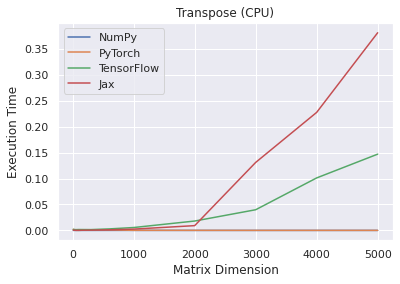

In [18]:
# Plotting graph
sns.set_theme()
times_data = pd.DataFrame({"Dim":dims, "NumPy":numpy_times, "PyTorch":torch_times, "TensorFlow":tf_times, "JAX":jax_times})
sns.lineplot(data=times_data, x="Dim", y="NumPy", label="NumPy")
sns.lineplot(data=times_data, x="Dim", y="PyTorch", label="PyTorch")
sns.lineplot(data=times_data, x="Dim", y="TensorFlow", label="TensorFlow")
sns.lineplot(data=times_data, x="Dim", y="JAX", label="Jax")
plt.xlabel('Matrix Dimension')
plt.ylabel('Execution Time')
plt.title('Transpose (CPU)')
plt.legend()
plt.show()

### Determinant

In [157]:
# NumPy
numpy_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = np.random.rand(k, k)
  st = time.process_time()
  np.linalg.det(a)
  et = time.process_time()
  res = et - st
  numpy_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.0005078610000168737 seconds
Execution time: 0.0007265890000098807 seconds
Execution time: 0.0024857299999894167 seconds
Execution time: 0.005637712999998712 seconds
Execution time: 0.03609358300002441 seconds
Execution time: 0.09500889000003099 seconds


/usr/local/lib/python3.8/dist-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Execution time: 0.5971468079999909 seconds
Execution time: 1.5675699139999892 seconds
Execution time: 3.260510217999979 seconds
Execution time: 5.977898641000024 seconds


In [158]:
# PyTorch
torch_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = torch.rand((k, k))
  st = time.process_time()
  torch.linalg.det(a)
  et = time.process_time()
  res = et - st
  torch_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.008666155000014442 seconds
Execution time: 0.0025576660000297124 seconds
Execution time: 0.00039928600000394 seconds
Execution time: 0.004293228999983967 seconds
Execution time: 0.007781993000037346 seconds
Execution time: 0.0262816299999713 seconds
Execution time: 0.2013084770000546 seconds
Execution time: 0.5046733519999975 seconds
Execution time: 1.0041748830000188 seconds
Execution time: 1.8313441480000279 seconds


In [159]:
# TF
tf_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = tf.random.uniform((k, k))
  st = time.process_time()
  tf.linalg.det(a, name = None)
  et = time.process_time()
  res = et - st
  tf_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.000962730000026113 seconds
Execution time: 0.0005676109999512846 seconds
Execution time: 0.0003208620000236806 seconds
Execution time: 0.0017895949999910954 seconds
Execution time: 0.009264341999994485 seconds
Execution time: 0.03691219700004922 seconds
Execution time: 0.4171505510000202 seconds
Execution time: 1.0127615449999894 seconds
Execution time: 2.1359977039999762 seconds
Execution time: 3.885977048999962 seconds


In [160]:
# JAX
jax_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = jax.random.uniform(key=key, shape=(k, k))
  st = time.process_time()
  c = jnp.linalg.det(a).block_until_ready()
  et = time.process_time()
  res = et - st
  jax_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.16937077300002557 seconds
Execution time: 0.1736116769999967 seconds
Execution time: 0.24663395800001808 seconds
Execution time: 0.3223944279999955 seconds
Execution time: 0.3899352650000196 seconds
Execution time: 0.3978973739999674 seconds
Execution time: 0.5593234600000301 seconds
Execution time: 1.1054115219999971 seconds
Execution time: 2.18811688400001 seconds
Execution time: 4.05946425999997 seconds


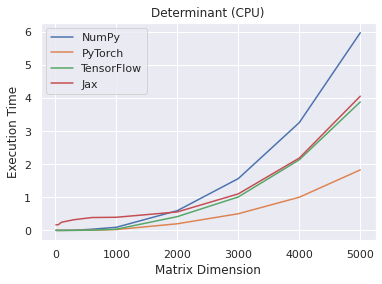

In [161]:
# Plotting graph
sns.set_theme()
times_data = pd.DataFrame({"Dim":dims, "NumPy":numpy_times, "PyTorch":torch_times, "TensorFlow":tf_times, "JAX":jax_times})
sns.lineplot(data=times_data, x="Dim", y="NumPy", label="NumPy")
sns.lineplot(data=times_data, x="Dim", y="PyTorch", label="PyTorch")
sns.lineplot(data=times_data, x="Dim", y="TensorFlow", label="TensorFlow")
sns.lineplot(data=times_data, x="Dim", y="JAX", label="Jax")
plt.xlabel('Matrix Dimension')
plt.ylabel('Execution Time')
plt.title('Determinant (CPU)')
plt.legend()
plt.show()

### Inverse

In [162]:
# NumPy
numpy_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = np.random.rand(k, k)
  st = time.process_time()
  np.linalg.inv(a)
  et = time.process_time()
  res = et - st
  numpy_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.0041600389999985055 seconds
Execution time: 0.0022702989999743295 seconds
Execution time: 0.001320372000009229 seconds
Execution time: 0.017182561000026908 seconds
Execution time: 0.07139041400000679 seconds
Execution time: 0.2617766749999646 seconds
Execution time: 1.6999418290000108 seconds
Execution time: 5.074030514000015 seconds
Execution time: 11.450540862000025 seconds
Execution time: 21.996720202999995 seconds


In [163]:
# PyTorch
torch_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = torch.rand((k, k))
  st = time.process_time()
  torch.linalg.inv(a)
  et = time.process_time()
  res = et - st
  torch_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.0020265580000113914 seconds
Execution time: 0.0011003760000107832 seconds
Execution time: 0.0011628130000076453 seconds
Execution time: 0.0030382649999864952 seconds
Execution time: 0.01732160199998134 seconds
Execution time: 0.07775888899999472 seconds
Execution time: 0.4735808239999528 seconds
Execution time: 1.5235621589999937 seconds
Execution time: 3.288317180999968 seconds
Execution time: 6.504106345000025 seconds


In [164]:
# TF
tf_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = tf.random.uniform((k, k))
  st = time.process_time()
  tf.linalg.inv(a, adjoint=False, name=None)
  et = time.process_time()
  res = et - st
  tf_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.0007318950000012592 seconds
Execution time: 0.00029978300000266245 seconds
Execution time: 0.0007231829999909678 seconds
Execution time: 0.007400409000013042 seconds
Execution time: 0.04193060400001514 seconds
Execution time: 0.1707855669999958 seconds
Execution time: 1.161883161999981 seconds
Execution time: 3.368750433999992 seconds
Execution time: 6.833227010999963 seconds
Execution time: 11.852797919000011 seconds


In [165]:
# JAX
jax_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = jax.random.uniform(key=key, shape=(k, k))
  st = time.process_time()
  jnp.linalg.inv(a).block_until_ready()
  et = time.process_time()
  res = et - st
  jax_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.1478845999999976 seconds
Execution time: 0.17021692600002325 seconds
Execution time: 0.27978573799998685 seconds
Execution time: 0.3357668660000286 seconds
Execution time: 0.365547179000032 seconds
Execution time: 0.45693857100002333 seconds
Execution time: 1.2041135989999816 seconds
Execution time: 2.8368903080000223 seconds
Execution time: 6.398646743000029 seconds
Execution time: 11.371349113000008 seconds


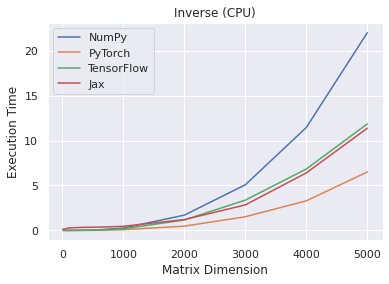

In [166]:
# Plotting graph
sns.set_theme()
times_data = pd.DataFrame({"Dim":dims, "NumPy":numpy_times, "PyTorch":torch_times, "TensorFlow":tf_times, "JAX":jax_times})
sns.lineplot(data=times_data, x="Dim", y="NumPy", label="NumPy")
sns.lineplot(data=times_data, x="Dim", y="PyTorch", label="PyTorch")
sns.lineplot(data=times_data, x="Dim", y="TensorFlow", label="TensorFlow")
sns.lineplot(data=times_data, x="Dim", y="JAX", label="Jax")
plt.xlabel('Matrix Dimension')
plt.ylabel('Execution Time')
plt.title('Inverse (CPU)')
plt.legend()
plt.show()

### Adjoint

In [167]:
# NumPy
numpy_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = np.random.rand(k, k)
  st = time.process_time()
  np.conj(a).T
  et = time.process_time()
  res = et - st
  numpy_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.00010778199998640048 seconds
Execution time: 2.2553999997398932e-05 seconds
Execution time: 3.3583999993425095e-05 seconds
Execution time: 0.0005380690000151844 seconds
Execution time: 0.0012864440000157629 seconds
Execution time: 0.0026159199999824523 seconds
Execution time: 0.01095240299997613 seconds
Execution time: 0.020942027999979018 seconds
Execution time: 0.05441392400001632 seconds
Execution time: 0.06721667599998682 seconds


In [168]:
# PyTorch
torch_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = torch.rand((k, k))
  st = time.process_time()
  a.adjoint()
  et = time.process_time()
  res = et - st
  torch_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.00038018300000430827 seconds
Execution time: 4.341400000384965e-05 seconds
Execution time: 3.73420000414626e-05 seconds
Execution time: 2.3633000012068806e-05 seconds
Execution time: 5.924900000309208e-05 seconds
Execution time: 4.843199997139891e-05 seconds
Execution time: 5.243999999038351e-05 seconds
Execution time: 5.374900001697824e-05 seconds
Execution time: 5.70099999777085e-05 seconds
Execution time: 5.6381000035798934e-05 seconds


In [169]:
# TF
tf_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = tf.random.uniform((k, k))
  st = time.process_time()
  tf.linalg.adjoint(a)
  et = time.process_time()
  res = et - st
  tf_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.0014493069999730324 seconds
Execution time: 0.000535178999996333 seconds
Execution time: 0.0009916029999885723 seconds
Execution time: 0.0013426570000092397 seconds
Execution time: 0.0022639869999920847 seconds
Execution time: 0.00582729500001733 seconds
Execution time: 0.022940926999979183 seconds
Execution time: 0.05318207599998459 seconds
Execution time: 0.08514752299998918 seconds
Execution time: 0.123859723999999 seconds


In [175]:
# JAX
jax_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = jax.random.uniform(key=key, shape=(k, k))
  st = time.process_time()
  x = jnp.conjugate(a).block_until_ready()
  jnp.transpose(x, axes=None).block_until_ready()
  et = time.process_time()
  res = et - st
  jax_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.00045258300002615215 seconds
Execution time: 0.00045283399998652385 seconds
Execution time: 0.0006628159999877425 seconds
Execution time: 0.0007585540000150104 seconds
Execution time: 0.001673082000024806 seconds
Execution time: 0.0035755200000266996 seconds
Execution time: 0.05117003499998418 seconds
Execution time: 0.16213188699998682 seconds
Execution time: 0.40364319000002524 seconds
Execution time: 0.21759424199996147 seconds


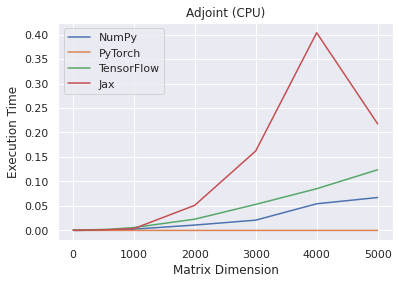

In [176]:
# Plotting graph
sns.set_theme()
times_data = pd.DataFrame({"Dim":dims, "NumPy":numpy_times, "PyTorch":torch_times, "TensorFlow":tf_times, "JAX":jax_times})
sns.lineplot(data=times_data, x="Dim", y="NumPy", label="NumPy")
sns.lineplot(data=times_data, x="Dim", y="PyTorch", label="PyTorch")
sns.lineplot(data=times_data, x="Dim", y="TensorFlow", label="TensorFlow")
sns.lineplot(data=times_data, x="Dim", y="JAX", label="Jax")
plt.xlabel('Matrix Dimension')
plt.ylabel('Execution Time')
plt.title('Adjoint (CPU)')
plt.legend()
plt.show()

### Cholesky Decomposition

In [177]:
# NumPy
numpy_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = np.random.rand(k, k)
  a = np.dot(a,a.T)
  st = time.process_time()
  np.linalg.cholesky(a)
  et = time.process_time()
  res = et - st
  numpy_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.00018359199998485565 seconds
Execution time: 9.802099998523772e-05 seconds
Execution time: 0.0008716069999650244 seconds
Execution time: 0.0031363640000563464 seconds
Execution time: 0.016286041999990175 seconds
Execution time: 0.06468199700003652 seconds
Execution time: 0.3877752409999857 seconds
Execution time: 1.1284153959999799 seconds
Execution time: 2.273845580999989 seconds
Execution time: 4.06610540600002 seconds


In [178]:
# TF
tf_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = tf.random.uniform((k, k))
  a = tf.tensordot(a,tf.transpose(a), axes = 1)
  st = time.process_time()
  tf.linalg.cholesky(a)
  et = time.process_time()
  res = et - st
  tf_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.0005748319999838714 seconds
Execution time: 0.0001524520000089069 seconds
Execution time: 0.00025853699997924195 seconds
Execution time: 0.0019558619999884286 seconds
Execution time: 0.008627266999951644 seconds
Execution time: 0.052506999000002 seconds
Execution time: 0.20631356300003745 seconds
Execution time: 0.46047253199998295 seconds
Execution time: 0.973526674000027 seconds
Execution time: 1.8753142840000123 seconds


In [179]:
# PyTorch
torch_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = torch.rand((k, k))
  a = torch.mm(a,torch.t(a))
  a.add_(torch.eye(k))
  st = time.process_time()
  torch.linalg.cholesky(a, upper=False, out=None)
  et = time.process_time()
  res = et - st
  torch_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.001012948999971286 seconds
Execution time: 0.00017044100002294726 seconds
Execution time: 0.00011371400000825815 seconds
Execution time: 0.0011867509999774484 seconds
Execution time: 0.002309335999996165 seconds
Execution time: 0.01138055999996368 seconds
Execution time: 0.10687139800000978 seconds
Execution time: 0.2129764919999957 seconds
Execution time: 0.6768124120000039 seconds
Execution time: 1.2036978969999836 seconds


In [180]:
# JAX
jax_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = jax.random.uniform(key=key, shape=(k, k))
  a = jnp.dot(a,jnp.transpose(a))
  st = time.process_time()
  jnp.linalg.cholesky(a).block_until_ready()
  et = time.process_time()
  res = et - st
  jax_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.04513957000000346 seconds
Execution time: 0.054260083000031045 seconds
Execution time: 0.04356734999998935 seconds
Execution time: 0.05262288800003034 seconds
Execution time: 0.14403737700001784 seconds
Execution time: 0.13897553200001767 seconds
Execution time: 0.27113331100002824 seconds
Execution time: 0.6402918019999788 seconds
Execution time: 1.216300145000048 seconds
Execution time: 2.2663050200000043 seconds


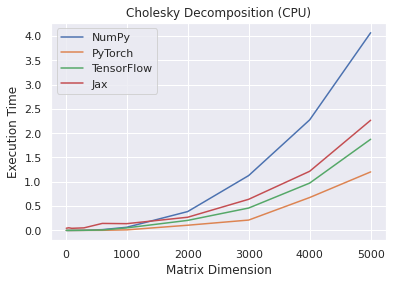

In [181]:
# Plotting graph
sns.set_theme()
times_data = pd.DataFrame({"Dim":dims, "NumPy":numpy_times, "PyTorch":torch_times, "TensorFlow":tf_times, "JAX":jax_times})
sns.lineplot(data=times_data, x="Dim", y="NumPy", label="NumPy")
sns.lineplot(data=times_data, x="Dim", y="PyTorch", label="PyTorch")
sns.lineplot(data=times_data, x="Dim", y="TensorFlow", label="TensorFlow")
sns.lineplot(data=times_data, x="Dim", y="JAX", label="Jax")
plt.xlabel('Matrix Dimension')
plt.ylabel('Execution Time')
plt.title('Cholesky Decomposition (CPU)')
plt.legend()
plt.show()

### LU Decomposition

In [4]:
# NumPy
# def plu(A):
#   n = A.shape[0]
#   U = A.copy()
#   L = np.eye(n, dtype=np.double)
#   P = np.eye(n, dtype=np.double)
#   for i in range(n):
#       for k in range(i, n): 
#           if ~np.isclose(U[i, i], 0.0):
#               break
#           U[[k, k+1]] = U[[k+1, k]]
#           P[[k, k+1]] = P[[k+1, k]]
#       factor = U[i+1:, i] / U[i, i]
#       L[i+1:, i] = factor
#       U[i+1:] -= factor[:, np.newaxis] * U[i]
#   return P, L, U

numpy_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = np.random.rand(k, k)
  st = time.process_time()
  P, L, U = scipy.linalg.lu(a)
  et = time.process_time()
  res = et - st
  numpy_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.0009590109999999541 seconds
Execution time: 0.002466913000000126 seconds
Execution time: 0.0015955960000004765 seconds
Execution time: 0.0237265760000005 seconds
Execution time: 0.058995181999999424 seconds
Execution time: 0.12991819500000013 seconds
Execution time: 0.6418387660000011 seconds
Execution time: 2.0869520129999994 seconds
Execution time: 3.276672178 seconds
Execution time: 6.392437162 seconds


In [5]:
# TF
tf_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = tf.random.uniform((k, k))
  st = time.process_time()
  tf.linalg.lu(a)
  et = time.process_time()
  res = et - st
  tf_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.0020348860000005686 seconds
Execution time: 0.0014820409999991568 seconds
Execution time: 0.001451015000000666 seconds
Execution time: 0.0014233479999994358 seconds
Execution time: 0.0014025470000014195 seconds
Execution time: 0.0015182649999978537 seconds
Execution time: 0.001373157999999819 seconds
Execution time: 0.0015776949999981582 seconds
Execution time: 0.001579031999998648 seconds
Execution time: 0.0014236340000017833 seconds


In [6]:
# PyTorch
torch_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = torch.rand((k, k))
  st = time.process_time()
  torch.linalg.lu(a, pivot=True, out=None)
  et = time.process_time()
  res = et - st
  torch_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.0009150659999974664 seconds
Execution time: 0.000426896000000454 seconds
Execution time: 0.0013143049999975176 seconds
Execution time: 0.003119448999999719 seconds
Execution time: 0.01222004799999965 seconds
Execution time: 0.04618684500000114 seconds
Execution time: 0.21277919199999928 seconds
Execution time: 0.6193066000000016 seconds
Execution time: 1.3695112410000014 seconds
Execution time: 2.524644213000002 seconds


In [7]:
# JAX
jax_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = jax.random.uniform(key=key, shape=(k, k))
  st = time.process_time()
  jax.lax.linalg.lu(a)
  et = time.process_time()
  res = et - st
  jax_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.13589373999999665 seconds
Execution time: 0.13729713600000082 seconds
Execution time: 0.13887445100000306 seconds
Execution time: 0.17058395600000154 seconds
Execution time: 0.19079838300000063 seconds
Execution time: 0.1645854809999996 seconds
Execution time: 0.38178423600000144 seconds
Execution time: 1.0144365379999982 seconds
Execution time: 2.0771894650000036 seconds
Execution time: 3.636666232000003 seconds


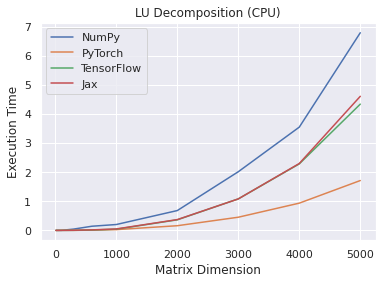

In [194]:
# Plotting graph
sns.set_theme()
times_data = pd.DataFrame({"Dim":dims, "NumPy":numpy_times, "PyTorch":torch_times, "TensorFlow":tf_times, "JAX":jax_times})
sns.lineplot(data=times_data, x="Dim", y="NumPy", label="NumPy")
sns.lineplot(data=times_data, x="Dim", y="PyTorch", label="PyTorch")
sns.lineplot(data=times_data, x="Dim", y="TensorFlow", label="TensorFlow")
sns.lineplot(data=times_data, x="Dim", y="JAX", label="Jax")
plt.xlabel('Matrix Dimension')
plt.ylabel('Execution Time')
plt.title('LU Decomposition (CPU)')
plt.legend()
plt.show()

### QR Factorization

In [195]:
# NumPy
numpy_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = np.random.rand(k, k)
  st = time.process_time()
  np.linalg.qr(a)
  et = time.process_time()
  res = et - st
  numpy_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.0017497780000894636 seconds
Execution time: 0.00045130400008019933 seconds
Execution time: 0.007613859000002776 seconds
Execution time: 0.03730245500003093 seconds
Execution time: 0.14407179800002723 seconds
Execution time: 0.5101557930000808 seconds
Execution time: 3.0567665319999833 seconds
Execution time: 9.324027354999998 seconds
Execution time: 20.69382353000003 seconds
Execution time: 35.94159722200004 seconds


In [196]:
# TF
tf_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = tf.random.uniform((k, k))
  st = time.process_time()
  tf.linalg.qr(a)
  et = time.process_time()
  res = et - st
  tf_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.0019034530000681116 seconds
Execution time: 0.0006902899999658985 seconds
Execution time: 0.0008035040000322624 seconds
Execution time: 0.0067402119999542265 seconds
Execution time: 0.037690621000024294 seconds
Execution time: 0.17941949700002624 seconds
Execution time: 1.3805865929999754 seconds
Execution time: 4.246237150999946 seconds
Execution time: 9.69471199499992 seconds
Execution time: 24.731574682999963 seconds


In [197]:
# PyTorch
torch_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = torch.rand((k, k))
  st = time.process_time()
  torch.linalg.qr(a, mode='reduced', out=None)
  et = time.process_time()
  res = et - st
  torch_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.0017665739999301877 seconds
Execution time: 0.002105606999975862 seconds
Execution time: 0.002599431000021468 seconds
Execution time: 0.008076786000060565 seconds
Execution time: 0.02526124299993171 seconds
Execution time: 0.10012497699995038 seconds
Execution time: 0.7588412129999824 seconds
Execution time: 2.4690529030000334 seconds
Execution time: 3.846496671000068 seconds
Execution time: 9.240842517000033 seconds


In [198]:
# JAX
jax_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000, 4000, 5000]
for k in dims:
  a = jax.random.uniform(key=key, shape=(k, k))
  st = time.process_time()
  jnp.linalg.qr(a, mode='reduced')
  et = time.process_time()
  res = et - st
  jax_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.07058084799996323 seconds
Execution time: 0.06979977399998916 seconds
Execution time: 0.07727386299995942 seconds
Execution time: 0.1924921339999628 seconds
Execution time: 0.26858452600004057 seconds
Execution time: 0.4192313890000605 seconds
Execution time: 1.743932147999999 seconds
Execution time: 5.327392936000024 seconds
Execution time: 9.358258084999989 seconds
Execution time: 22.794230148999986 seconds


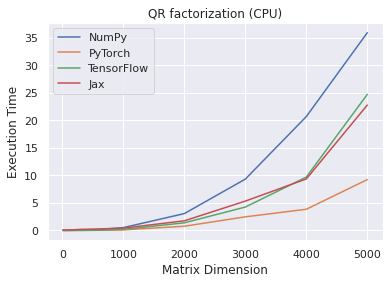

In [199]:
# Plotting graph
sns.set_theme()
times_data = pd.DataFrame({"Dim":dims, "NumPy":numpy_times, "PyTorch":torch_times, "TensorFlow":tf_times, "JAX":jax_times})
sns.lineplot(data=times_data, x="Dim", y="NumPy", label="NumPy")
sns.lineplot(data=times_data, x="Dim", y="PyTorch", label="PyTorch")
sns.lineplot(data=times_data, x="Dim", y="TensorFlow", label="TensorFlow")
sns.lineplot(data=times_data, x="Dim", y="JAX", label="Jax")
plt.xlabel('Matrix Dimension')
plt.ylabel('Execution Time')
plt.title('QR factorization (CPU)')
plt.legend()
plt.show()

### Eigen Decomposition

In [3]:
# NumPy
numpy_times = []
dims = [10, 50, 100, 300, 600, 1000] #, 2000, 3000] # 4000, 5000]
for k in dims:
  a = np.random.rand(k, k)
  st = time.process_time()
  np.linalg.eig(a)
  et = time.process_time()
  res = et - st
  numpy_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.002205881000000076 seconds
Execution time: 0.0025017100000006565 seconds
Execution time: 0.031016064999999315 seconds
Execution time: 0.28419512800000035 seconds
Execution time: 1.5732075610000003 seconds
Execution time: 4.565596911 seconds


In [4]:
# TF
tf_times = []
dims = [10, 50, 100, 300, 600, 1000]# 2000, 3000] # 4000, 5000]
for k in dims:
  a = tf.random.uniform((k, k))
  st = time.process_time()
  tf.linalg.eig(a)
  et = time.process_time()
  res = et - st
  tf_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.001284648000000388 seconds
Execution time: 0.0016294509999994489 seconds
Execution time: 0.010044515000000587 seconds
Execution time: 0.22862782800000048 seconds
Execution time: 2.9844688589999997 seconds
Execution time: 13.675327307 seconds


In [5]:
# PyTorch
torch_times = []
dims = [10, 50, 100, 300, 600, 1000] #, 2000, 3000] # 4000, 5000]
for k in dims:
  a = torch.rand((k, k))
  st = time.process_time()
  torch.linalg.eig(a, out=None)
  et = time.process_time()
  res = et - st
  torch_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.0016968660000031832 seconds
Execution time: 0.002269696999995574 seconds
Execution time: 0.010462881000002255 seconds
Execution time: 0.09305261599999426 seconds
Execution time: 0.46915173099999663 seconds
Execution time: 1.2646478610000003 seconds


In [9]:
# JAX
jax_times = []
dims = [10, 50, 100, 300, 600, 1000] #, 2000, 3000] # 4000, 5000]
for k in dims:
  a = jax.random.uniform(key=key, shape=(k, k))
  st = time.process_time()
  jnp.linalg.eig(a)
  et = time.process_time()
  res = et - st
  jax_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.0006929500000012467 seconds
Execution time: 0.0021365700000046672 seconds
Execution time: 0.0254716999999971 seconds
Execution time: 0.19113229900000306 seconds
Execution time: 0.9883932190000024 seconds
Execution time: 2.9667272330000003 seconds


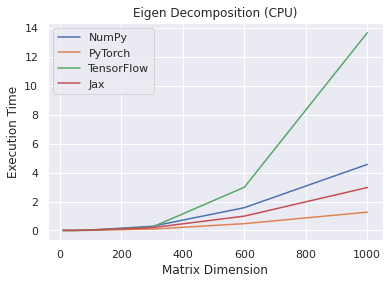

In [10]:
# Plotting graph
sns.set_theme()
times_data = pd.DataFrame({"Dim":dims, "NumPy":numpy_times, "PyTorch":torch_times, "TensorFlow":tf_times, "JAX":jax_times})
sns.lineplot(data=times_data, x="Dim", y="NumPy", label="NumPy")
sns.lineplot(data=times_data, x="Dim", y="PyTorch", label="PyTorch")
sns.lineplot(data=times_data, x="Dim", y="TensorFlow", label="TensorFlow")
sns.lineplot(data=times_data, x="Dim", y="JAX", label="Jax")
plt.xlabel('Matrix Dimension')
plt.ylabel('Execution Time')
plt.title('Eigen Decomposition (CPU)')
plt.legend()
plt.show()

### PCA

In [21]:
# NumPy
numpy_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000] # 4000, 5000]
for k in dims:
  x = np.random.rand(k, k)
  st = time.process_time()
  x = x - x.mean(axis = 0)
  cov = np.cov(x.T) / x.shape[0]
  v, w = np.linalg.eig(cov)
  et = time.process_time()
  res = et - st
  numpy_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.0007210720000045967 seconds
Execution time: 0.0023283900000024005 seconds
Execution time: 0.01588394899999912 seconds
Execution time: 0.27996784100000127 seconds
Execution time: 1.2728116010000008 seconds
Execution time: 3.646075737999979 seconds
Execution time: 21.21910943200001 seconds
Execution time: 59.74902223099997 seconds


In [22]:
# PyTorch
torch_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000] # 4000, 5000]
for k in dims:
  x = torch.rand(k, k)
  st = time.process_time()
  x = x - x.mean(axis = 0)
  cov = torch.cov(x.T) / x.shape[0]
  v, w = torch.linalg.eig(cov)
  et = time.process_time()
  res = et - st
  torch_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.0040772570000058295 seconds
Execution time: 0.0012598749999597203 seconds
Execution time: 0.003933487000040259 seconds
Execution time: 0.08369238699998505 seconds
Execution time: 0.3821784279999747 seconds
Execution time: 1.381375695000031 seconds
Execution time: 11.622664127999997 seconds
Execution time: 41.33261728299999 seconds


In [26]:
# TF
tf_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000] # 4000, 5000]
for k in dims:
  x = tf.random.uniform((k, k))
  st = time.process_time()
  x = x - tf.reduce_mean(x, axis=0)
  ans = tf.linalg.eigh(tf.tensordot(tf.transpose(x), x, axes=1))
  et = time.process_time()
  res = et - st
  tf_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.0033278090000408156 seconds
Execution time: 0.0023715810000339843 seconds
Execution time: 0.004282706000026337 seconds
Execution time: 0.06541146200004277 seconds
Execution time: 0.45384059099995966 seconds
Execution time: 2.1470161839999946 seconds
Execution time: 16.214178497000034 seconds
Execution time: 37.082383186000015 seconds


In [24]:
# JAX
jax_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000] # 4000, 5000]
for k in dims:
  x = jax.random.uniform(key, shape=(k,k)) 
  st = time.process_time()
  x = x - x.mean(axis = 0)
  cov = jnp.cov(x.T) / x.shape[0]
  v, w = jnp.linalg.eig(cov)
  et = time.process_time()
  res = et - st
  jax_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.000896407000027466 seconds
Execution time: 0.0015803949999622091 seconds
Execution time: 0.015164044000016474 seconds
Execution time: 0.13760063000000855 seconds
Execution time: 0.836645548999968 seconds
Execution time: 2.628469671000005 seconds
Execution time: 16.760766896000007 seconds
Execution time: 50.881167885000025 seconds


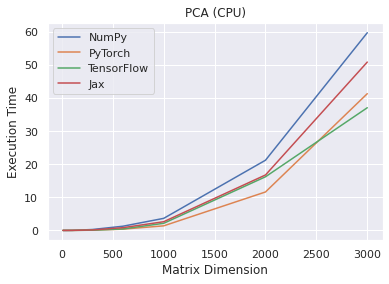

In [27]:
# Plotting graph
sns.set_theme()
times_data = pd.DataFrame({"Dim":dims, "NumPy":numpy_times, "PyTorch":torch_times, "TensorFlow":tf_times, "JAX":jax_times})
sns.lineplot(data=times_data, x="Dim", y="NumPy", label="NumPy")
sns.lineplot(data=times_data, x="Dim", y="PyTorch", label="PyTorch")
sns.lineplot(data=times_data, x="Dim", y="TensorFlow", label="TensorFlow")
sns.lineplot(data=times_data, x="Dim", y="JAX", label="Jax")
plt.xlabel('Matrix Dimension')
plt.ylabel('Execution Time')
plt.title('PCA (CPU)')
plt.legend()
plt.show()

### SVD

In [7]:
# NumPy
numpy_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000] # 4000, 5000]
for k in dims:
  x = np.random.rand(k, k)
  st = time.process_time()
  svd = np.linalg.svd(x)
  et = time.process_time()
  res = et - st
  numpy_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.0003903569999987866 seconds
Execution time: 0.005897818000001109 seconds
Execution time: 0.006904433000000765 seconds
Execution time: 0.10819080500000133 seconds
Execution time: 0.6328129610000008 seconds
Execution time: 2.0616325699999987 seconds
Execution time: 15.450890138999998 seconds
Execution time: 46.21528739600001 seconds


In [11]:
# PyTorch
torch_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000] # 4000, 5000]
for k in dims:
  x = torch.rand(k, k)
  st = time.process_time()
  svd = torch.svd(x)
  et = time.process_time()
  res = et - st
  torch_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.00028572400000825837 seconds
Execution time: 0.0012653400000033344 seconds
Execution time: 0.004375046999996357 seconds
Execution time: 0.022257491000004848 seconds
Execution time: 0.14800965300000257 seconds
Execution time: 0.5112300350000112 seconds
Execution time: 3.5738527540000007 seconds
Execution time: 11.125185885999997 seconds


In [9]:
# TF
tf_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000] # 4000, 5000]
for k in dims:
  with tf.GradientTape() as g:
    x = tf.random.uniform((k, k))
    st = time.process_time()
    svd = tf.linalg.svd(x)
    et = time.process_time()
    res = et - st
    tf_times.append(res)
    print('Execution time:', res, 'seconds')

Execution time: 0.00045647200001042165 seconds
Execution time: 0.002520105000002104 seconds
Execution time: 0.0034879779999954508 seconds
Execution time: 0.029628203000001463 seconds
Execution time: 0.24877620299999137 seconds
Execution time: 0.7129772700000103 seconds
Execution time: 4.755138821999992 seconds
Execution time: 15.965415745000001 seconds


In [10]:
# JAX
jax_times = []
dims = [10, 50, 100, 300, 600, 1000, 2000, 3000] # 4000, 5000]
for k in dims:
  x = jax.random.uniform(key, shape=(k,k))
  st = time.process_time()
  svd = jnp.linalg.svd(x)
  et = time.process_time()
  res = et - st
  jax_times.append(res)
  print('Execution time:', res, 'seconds')

Execution time: 0.03352295199999844 seconds
Execution time: 0.060356243000001086 seconds
Execution time: 0.053855403000000024 seconds
Execution time: 1.1441389530000095 seconds
Execution time: 2.6853986609999936 seconds
Execution time: 1.1550757020000049 seconds
Execution time: 6.948822256 seconds
Execution time: 24.600036256999985 seconds


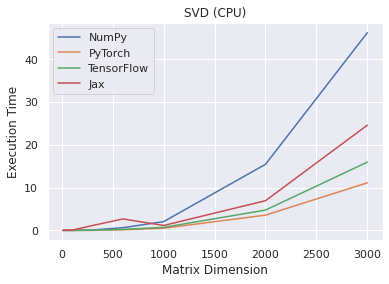

In [12]:
# Plotting graph
sns.set_theme()
times_data = pd.DataFrame({"Dim":dims, "NumPy":numpy_times, "PyTorch":torch_times, "TensorFlow":tf_times, "JAX":jax_times})
sns.lineplot(data=times_data, x="Dim", y="NumPy", label="NumPy")
sns.lineplot(data=times_data, x="Dim", y="PyTorch", label="PyTorch")
sns.lineplot(data=times_data, x="Dim", y="TensorFlow", label="TensorFlow")
sns.lineplot(data=times_data, x="Dim", y="JAX", label="Jax")
plt.xlabel('Matrix Dimension')
plt.ylabel('Execution Time')
plt.title('SVD (CPU)')
plt.legend()
plt.show()